## Paso 1: Cargar datos

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [121]:
# Cargar datos
consum_capita = pd.read_excel('consumcapita.xlsx')
esdeveniments = pd.read_excel('esdeveniments.xlsx')
producte = pd.read_excel('producte.xlsx')
regio_geografica = pd.read_excel('regiogeografica.xlsx')
temporada_cultiu = pd.read_excel('temporadacultiu.xlsx')
valor_borsa = pd.read_excel('valorborsa.xlsx')
valor_mercat = pd.read_excel('valormercat.xlsx')

## CABECERAS

In [122]:
print("Consum per capita:")
consum_capita.head()

Consum per capita:


,idPais,nomPais,Quantitat,Data
0,1,Espanya,296,2019-01-01 00:00:00
1,1,Espanya,300,2020-01-01 00:00:00
2,1,Espanya,295,2021-01-01 00:00:00
3,1,Espanya,290,2022-01-01 00:00:00
4,1,Espanya,285,2023-01-01 00:00:00


In [123]:
print("Esdeveniments:")
esdeveniments.head()

Esdeveniments:


,idEsdeveniment,nom,data,tipus
0,1,Incremento de Demanda y Problemas en la Cadena...,2019-01-01 00:00:00,Economico
1,2,Crisis en el Medio Oriente,2020-01-01 00:00:00,Politico
2,3,Brexit,2020-01-31 00:00:00,Politico
3,4,COVID-19,2020-03-11 00:00:00,Economico
4,5,Real Decreto-ley 15/2020 - Medidas Urgentes pa...,2020-04-01 00:00:00,Politico


In [124]:
print("Producte:")
producte.head()

Producte:


,idProducte,idRegio,idTemporada,nom,tipus,pes
0,1,1,5,Trigo,Cereal,1000
1,2,2,5,Cebada,Cereal,1000
2,3,3,5,Maíz,Cereal,1000
3,4,1,1,Limón,Fruta,100
4,5,2,1,Clementina,Fruta,100


In [125]:
print("Regió geogràfica:")
regio_geografica

Regió geogràfica:


,idRegio,nom,clima,poblacio,recursosNaturals,paisosQueAbasta
0,1,Europa del Sur,Mediterráneo,100000000,"Agua, Tierra fértil","España, Italia, Grecia"
1,2,California,Mediterráneo,50000000,"Agua, Tierra fértil",Estados Unidos
2,3,Sudamérica,Tropical,300000000,"Agua, Tierra fértil","Brasil, Argentina, Perú"


In [126]:
print("Temporada de cultiu:")
temporada_cultiu.head()

Temporada de cultiu:


,idTemporada,idProducte,tipus,començamentTemporada,fiTemporada,hemisferi
0,1,4,Invierno,2022-12-01 00:00:00,2023-02-28 00:00:00,Norte y Sur
1,1,5,Invierno,2022-12-01 00:00:00,2023-02-28 00:00:00,Norte y Sur
2,1,6,Invierno,2022-12-01 00:00:00,2023-02-28 00:00:00,Norte y Sur
3,1,9,Invierno,2022-12-01 00:00:00,2023-02-28 00:00:00,Norte y Sur
4,1,24,Invierno,2022-12-01 00:00:00,2023-02-28 00:00:00,Norte y Sur


In [127]:
print("Valor borsa:")
valor_borsa.head()

Valor borsa:


,idCompanyia,nomCompanyia,data,valorAccions
0,1,Greenyard,2019-03-31 00:00:00,3.34
1,1,Greenyard,2019-06-30 00:00:00,3.46
2,1,Greenyard,2019-09-30 00:00:00,2.85
3,1,Greenyard,2020-03-31 00:00:00,3.89
4,1,Greenyard,2020-06-30 00:00:00,5.58


In [177]:
print("Valor mercat:")
valor_mercat = valor_mercat[valor_mercat['preu'] != 0]
# Convert 'data' column to datetime
valor_mercat['data'] = pd.to_datetime(valor_mercat['data'])
valor_mercat

Valor mercat:


,idProducte,data,preu,unitatMesura
0,1,2019-03-31,195.71,€/100kg
1,1,2019-06-30,189.88,€/100kg
2,1,2019-09-30,190.19,€/100kg
3,1,2020-03-31,200.54,€/100kg
4,1,2020-06-30,185.01,€/100kg
...,...,...,...,...
699,41,2022-09-30,38.86,€/100kg
700,41,2023-03-31,51.72,€/100kg
701,41,2023-06-30,49.60,€/100kg
702,41,2023-09-30,34.53,€/100kg


## Paso 2: Definir Objetivos del Análisis


### 2.1 Tendencias Temporales:

¿Cuáles son las tendencias a lo largo del tiempo para los precios de ciertos productos?

¿Existen patrones estacionales en los precios?

In [129]:
# Merge product and price datasets
merged_data = pd.merge(producte, valor_mercat, on='idProducte')
# Convertir la columna de fecha a tipo datetime
merged_data['data'] = pd.to_datetime(merged_data['data'])
merged_data['year'] = merged_data['data'].dt.year


In [130]:
merged_data.head()

,idProducte,idRegio,idTemporada,nom,tipus,pes,data,preu,unitatMesura,year
0,1,1,5,Trigo,Cereal,1000,2019-03-31,195.71,€/100kg,2019
1,1,1,5,Trigo,Cereal,1000,2019-06-30,189.88,€/100kg,2019
2,1,1,5,Trigo,Cereal,1000,2019-09-30,190.19,€/100kg,2019
3,1,1,5,Trigo,Cereal,1000,2020-03-31,200.54,€/100kg,2020
4,1,1,5,Trigo,Cereal,1000,2020-06-30,185.01,€/100kg,2020


In [131]:
def filter_products(data, start_year=2019, end_year=2023):
    # Filtrar datos para los años de interés
    filtered_data = data[(data['year'] >= start_year) | (data['year'] <= end_year)]

    # Crear una tabla pivote para contar los datos por producto y año
    pivot_table = filtered_data.pivot_table(index='nom', columns='year', values='preu', aggfunc='count', fill_value=0)

    # Identificar productos con datos faltantes en algún año (cuenta 0)
    products_to_drop = pivot_table[(pivot_table == 0).any(axis=1)].index

    # Eliminar productos identificados
    cleaned_data = data[~data['nom'].isin(products_to_drop)]

    return cleaned_data
merged_data = filter_products(merged_data)

In [132]:
# Filter data for each product type
cereals_data = merged_data[merged_data['tipus'] == 'Cereal']
fruits_data = merged_data[merged_data['tipus'] == 'Fruta']
vegetables_data = merged_data[merged_data['tipus'] == 'Verdura']

In [133]:
def calculate_price_correlation(data):

    # Convertir la columna 'data' a tipo datetime si aún no está en ese formato
    data['data'] = pd.to_datetime(data['data'])
    
    # Crear una tabla pivote con 'data' como índice, 'nom' como columnas y 'preu' como valores
    pivot_table = data.pivot_table(index='data', columns='nom', values='preu')
    
    # Calcular la matriz de correlación de Pearson entre los precios de los productos
    correlation_matrix = pivot_table.corr(method='pearson')
    
    return correlation_matrix.mean().mean()



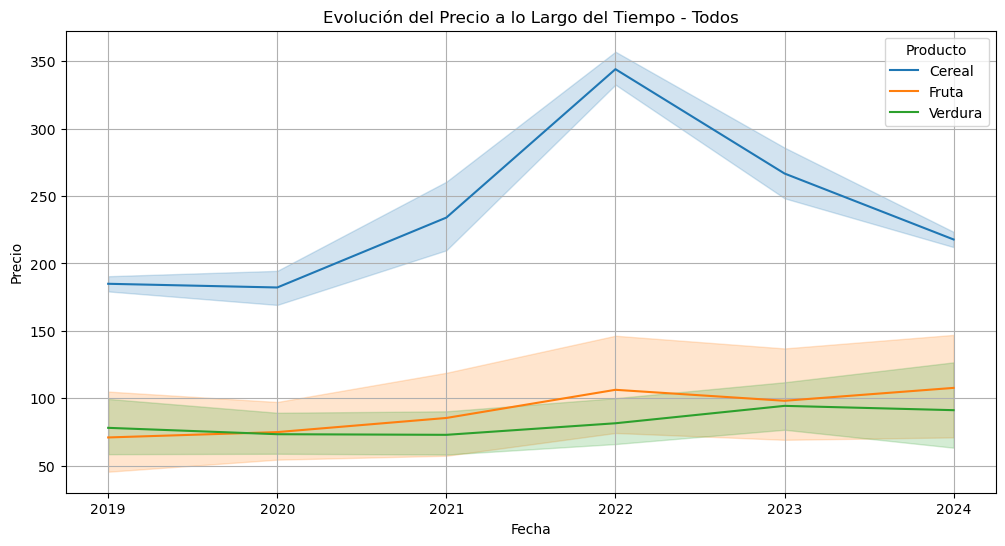

Correlacion del precio: 0.22773239081956703


In [134]:
import warnings
warnings.filterwarnings('ignore')
def plot_price_over_time(data, product_type, hue='nom'):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='year', y='preu', hue=hue, data=data)
    plt.title(f'Evolución del Precio a lo Largo del Tiempo - {product_type}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend(title='Producto')
    plt.grid(True)
    plt.show()

# Crear gráficos para cada tipo de producto
plot_price_over_time(merged_data, 'Todos',hue='tipus')

# Merge product and price datasets
product_price = pd.merge(producte, valor_mercat, on='idProducte')
product_price['year'] = product_price['data'].dt.year
product_price = filter_products(product_price)
print("Correlacion del precio: " + str(calculate_price_correlation((product_price))))


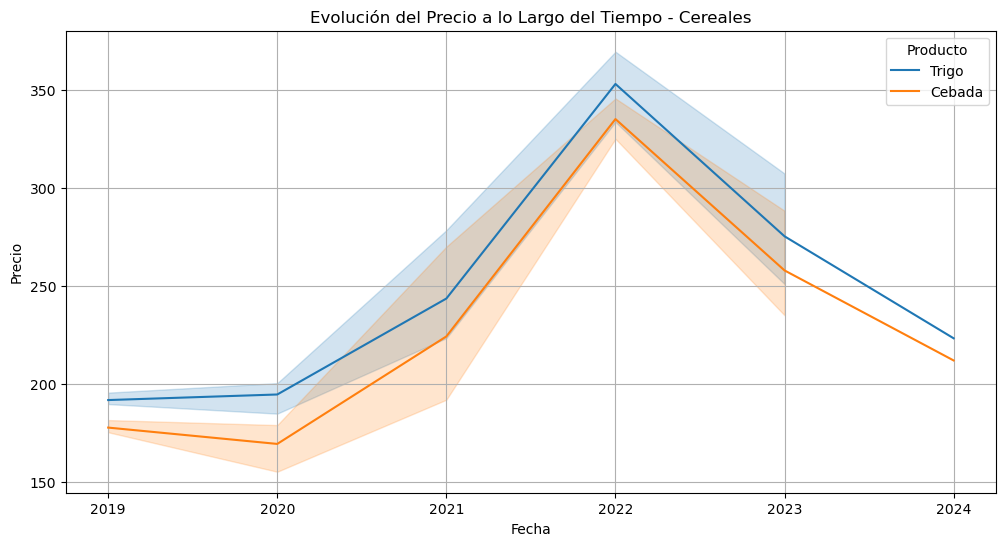

Correlacion del precio de cereales: 0.9971621577715264


In [135]:
plot_price_over_time(cereals_data, 'Cereales')
cereals = producte[producte['tipus'] == 'Cereal']
cereals_price = product_price[product_price['idProducte'].isin(cereals['idProducte'])]
print("Correlacion del precio de cereales: " + str(calculate_price_correlation((cereals_price))))


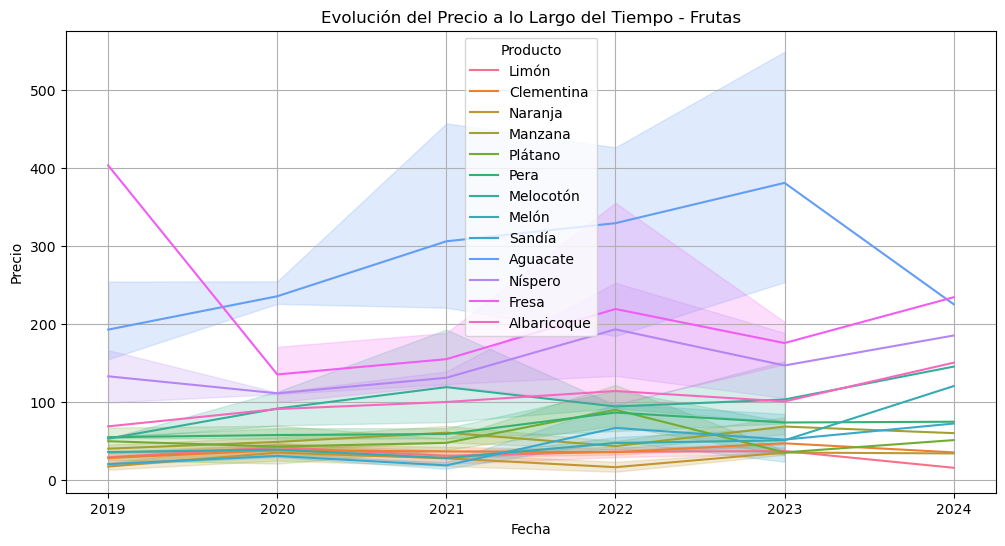

Correlacion del precio de frutas: 0.2191554986844508


In [136]:
plot_price_over_time(fruits_data, 'Frutas')
frutas = producte[producte['tipus'] == 'Fruta']
frutas_price = product_price[product_price['idProducte'].isin(frutas['idProducte'])]
print("Correlacion del precio de frutas: " + str(calculate_price_correlation((frutas_price))))

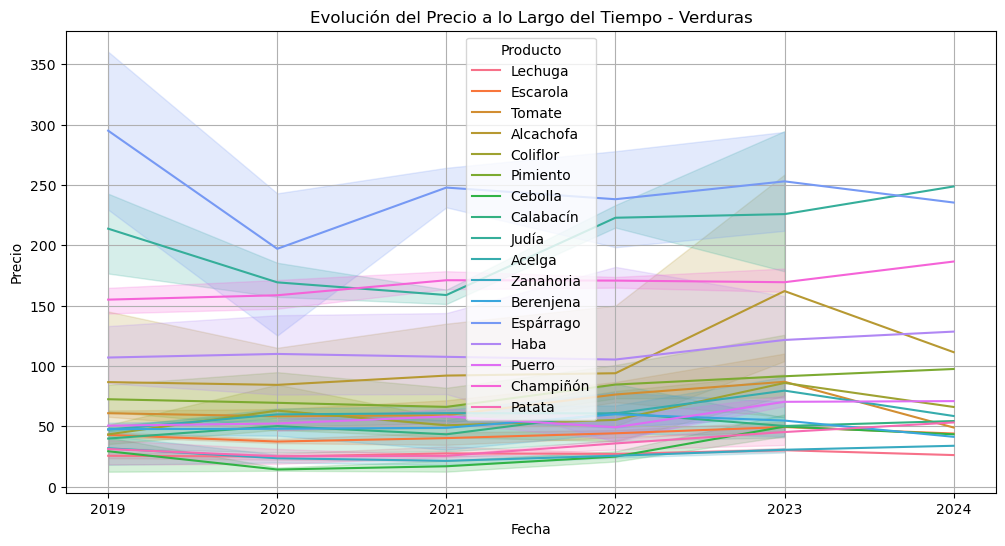

Correlacion del precio de verduras: 0.32074304594244685


In [137]:
plot_price_over_time(vegetables_data, 'Verduras')
verduras = producte[producte['tipus'] == 'Verdura']
vegetables_price = product_price[product_price['idProducte'].isin(verduras['idProducte'])]
print("Correlacion del precio de verduras: " + str(calculate_price_correlation((vegetables_price))))

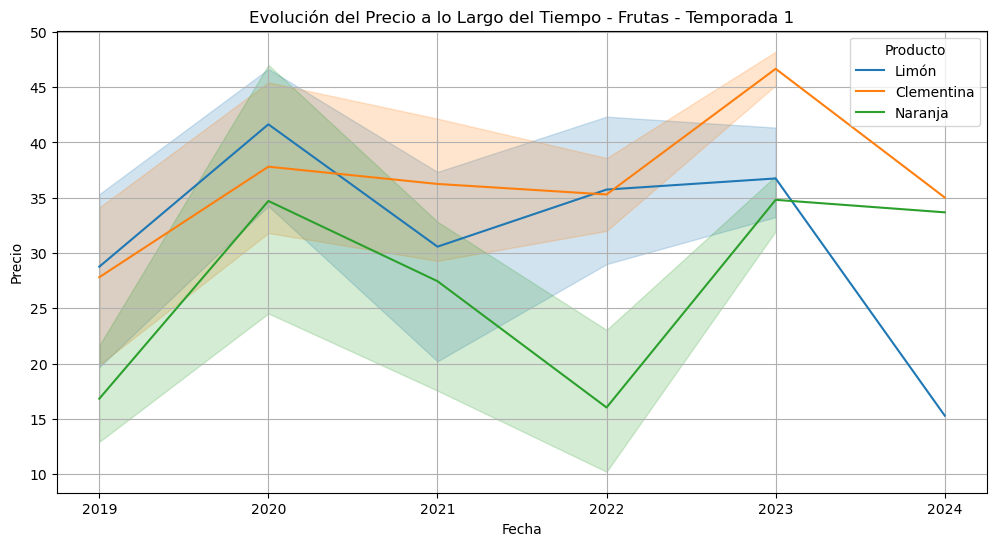

Correlacion del precio de frutas t1: 0.6376868258054328


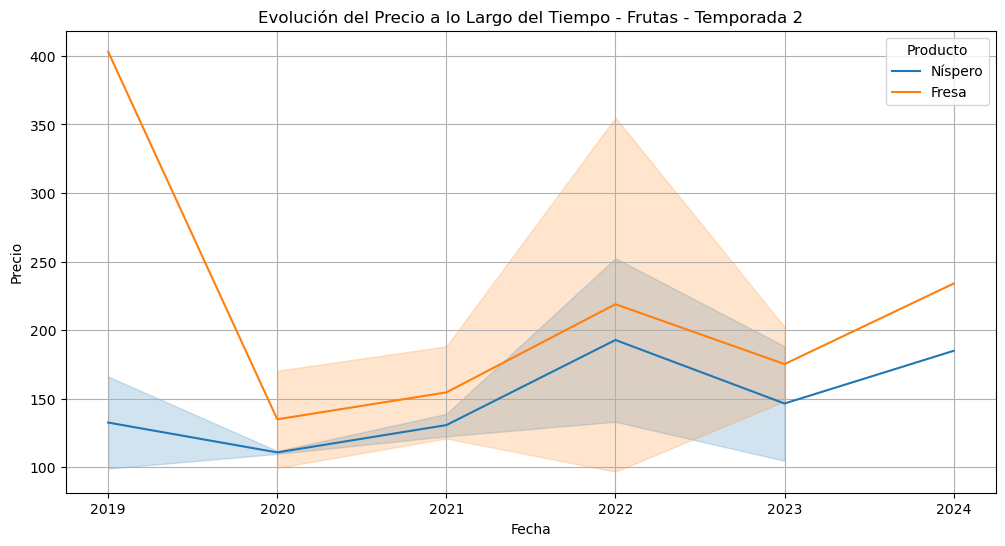

Correlacion del precio de frutas t2: 0.8358099685268714


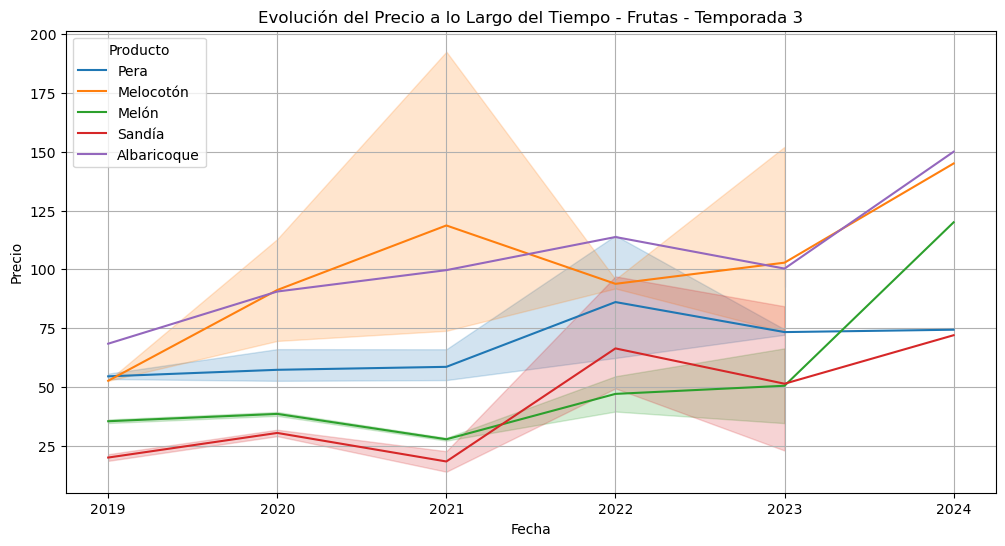

Correlacion del precio de frutas t3: 0.7053686847283884


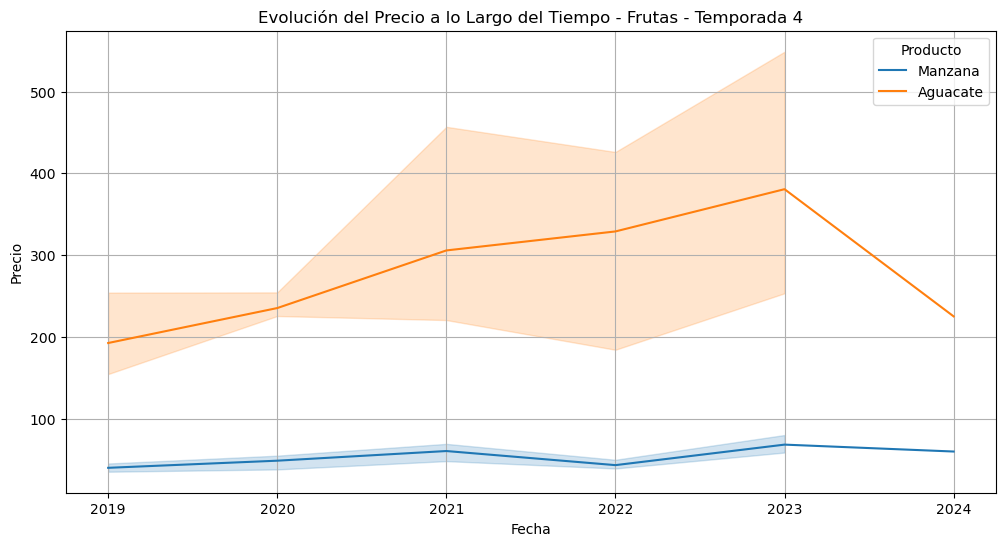

Correlacion del precio de frutas t4: 0.8011864506449405


In [138]:
frutas_t1 = fruits_data[fruits_data['idTemporada'] == 1]
frutas_t2 = fruits_data[fruits_data['idTemporada'] == 2]
frutas_t3 = fruits_data[fruits_data['idTemporada'] == 3]
frutas_t4 = fruits_data[fruits_data['idTemporada'] == 4]

plot_price_over_time(frutas_t1, 'Frutas - Temporada 1')
print("Correlacion del precio de frutas t1: " + str(calculate_price_correlation((frutas_t1))))
plot_price_over_time(frutas_t2, 'Frutas - Temporada 2')
print("Correlacion del precio de frutas t2: " + str(calculate_price_correlation((frutas_t2))))
plot_price_over_time(frutas_t3, 'Frutas - Temporada 3')
print("Correlacion del precio de frutas t3: " + str(calculate_price_correlation((frutas_t3))))
plot_price_over_time(frutas_t4, 'Frutas - Temporada 4')
print("Correlacion del precio de frutas t4: " + str(calculate_price_correlation((frutas_t4))))

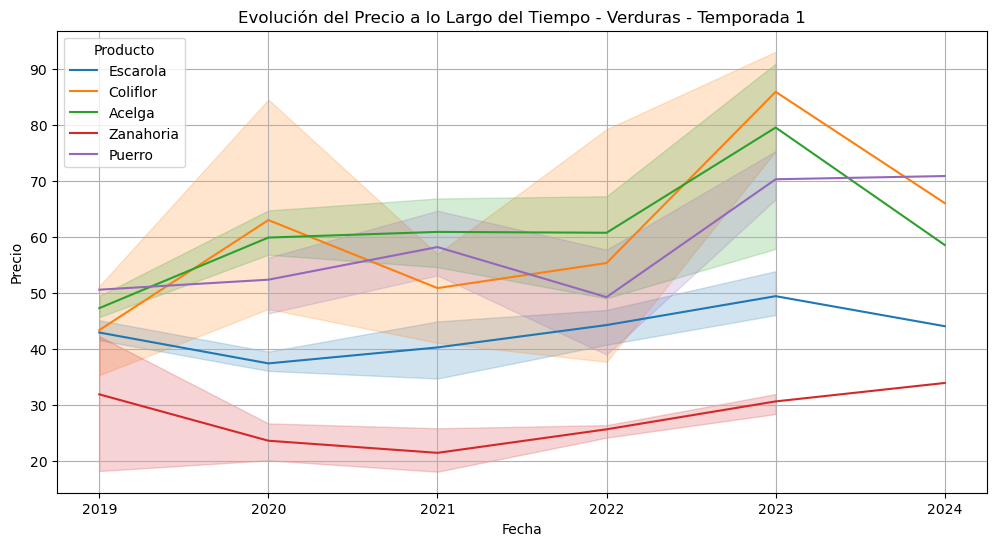

Correlacion del precio de verduras t1: 0.5432830163831364


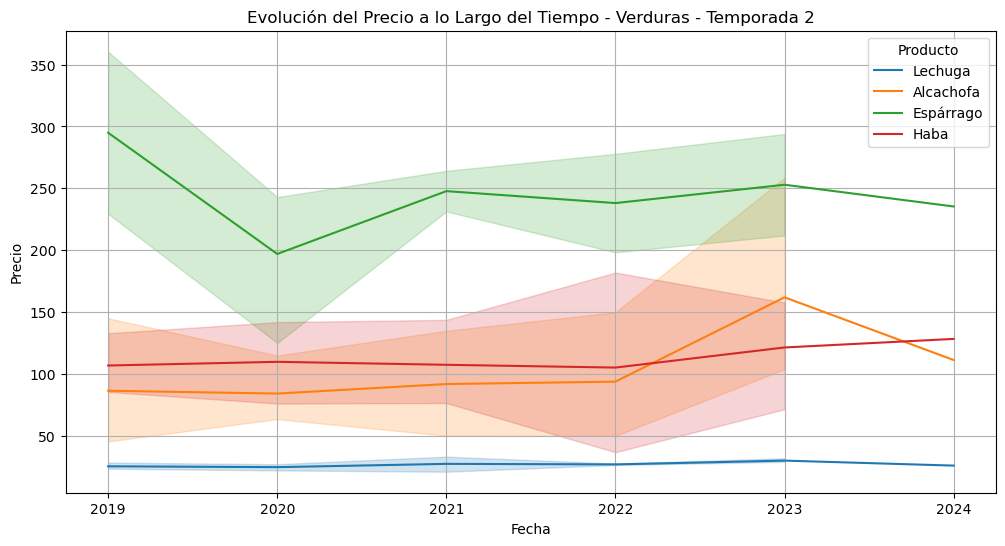

Correlacion del precio de verduras t2: 0.45266740313917186


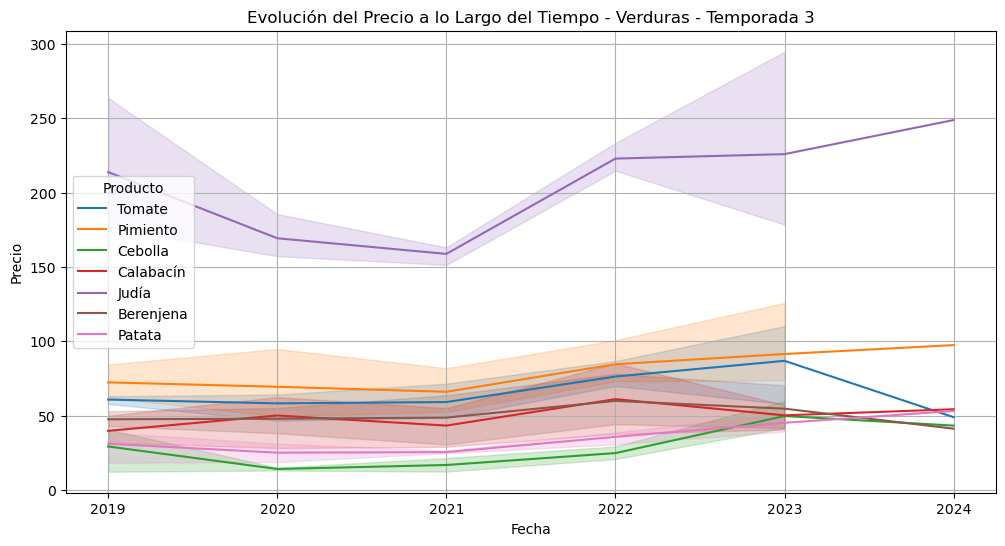

Correlacion del precio de verduras t3: 0.5482255953345716


In [139]:
vegetables_t1 = vegetables_data[vegetables_data['idTemporada'] == 1]
vegetables_t2 = vegetables_data[vegetables_data['idTemporada'] == 2]
vegetables_t3 = vegetables_data[vegetables_data['idTemporada'] == 3]
vegetables_t4 = vegetables_data[vegetables_data['idTemporada'] == 4]

plot_price_over_time(vegetables_t1, 'Verduras - Temporada 1')
vegetables_t1 = vegetables_data[vegetables_data['idTemporada'] == 1]
print("Correlacion del precio de verduras t1: " + str(calculate_price_correlation((vegetables_t1))))
plot_price_over_time(vegetables_t2, 'Verduras - Temporada 2')
vegetables_t2 = vegetables_data[vegetables_data['idTemporada'] == 2]
print("Correlacion del precio de verduras t2: " + str(calculate_price_correlation((vegetables_t2))))
plot_price_over_time(vegetables_t3, 'Verduras - Temporada 3')
vegetables_t3 = vegetables_data[vegetables_data['idTemporada'] == 3]
print("Correlacion del precio de verduras t3: " + str(calculate_price_correlation((vegetables_t3))))


### Explorando las Correlaciones entre los Precios de los Productos

Observamos una notable correlación entre los precios de los productos de cereales básicos. No los hemos separado por temporadas ya que de base, ya pertenecen a la misma, los datos revelan una fuerte correlación entre ellos.

Por otro lado, al analizar los precios de las frutas, inicialmente no se percibe una correlación evidente. Sin embargo, al segmentar los datos por temporadas, se revela una correlación más significativa, lo que sugiere que esta estadística ofrece una visión más precisa de la relación entre los precios.

En el caso de las verduras, al observar los datos en su totalidad, al igual que en las frutas no se percibe una correlación evidente. Sin embargo, al examinar los precios por temporadas, se observa una mejora en la correlación, aunque no tan marcada como en los otros grupos de productos.




### 2.2 Impacto de Eventos Políticos:

¿Cómo afectan los eventos políticos relevantes a los precios de los productos?

¿Hay ciertos tipos de eventos que tienen un mayor impacto en los precios?


In [140]:
esdeveniments.head()

,idEsdeveniment,nom,data,tipus
0,1,Incremento de Demanda y Problemas en la Cadena...,2019-01-01 00:00:00,Economico
1,2,Crisis en el Medio Oriente,2020-01-01 00:00:00,Politico
2,3,Brexit,2020-01-31 00:00:00,Politico
3,4,COVID-19,2020-03-11 00:00:00,Economico
4,5,Real Decreto-ley 15/2020 - Medidas Urgentes pa...,2020-04-01 00:00:00,Politico


In [141]:
valor_mercat.head()

,idProducte,data,preu,unitatMesura
0,1,2019-03-31,195.71,€/100kg
1,1,2019-06-30,189.88,€/100kg
2,1,2019-09-30,190.19,€/100kg
3,1,2020-03-31,200.54,€/100kg
4,1,2020-06-30,185.01,€/100kg


In [196]:
# Lista para almacenar los resultados de la comparación
resultados = []

# Iterar por cada evento
for _, evento in esdeveniments.iterrows():
    fecha_evento = evento['data']
    nombre_evento = evento['nom']
    
    # Buscar productos dentro del rango de días antes y después del evento
    fechas_rango = [fecha_evento + timedelta(days=i) for i in range(-19, 20)]
    productos_en_fecha = valor_mercat[valor_mercat['data'].isin(fechas_rango)]
    
    if not productos_en_fecha.empty:
        # Iterar por tipo de producto
        for tipo_producto in producte['tipus'].unique():
            # Iterar por región
            for region in regio_geografica['nom'].unique():
                # Filtrar productos por tipo y región
                datos_tipo_producto_region = productos_en_fecha.merge(producte[(producte['tipus'] == tipo_producto)], on='idProducte', how='inner')
                datos_tipo_producto_region = datos_tipo_producto_region.merge(regio_geografica[regio_geografica['nom'] == region], on='idRegio', how='inner')
                
                if not datos_tipo_producto_region.empty:
                    for id_producto in datos_tipo_producto_region['idProducte'].unique():
                        # Calcular promedio de precios antes del evento
                        rango_antes = [fecha_evento - timedelta(days=i) for i in range(1, dias_antes + 1)]
                        precios_antes = valor_mercat[(valor_mercat['idProducte'] == id_producto) & (valor_mercat['data'].isin(rango_antes))]['preu']
                        promedio_antes = precios_antes.mean() if not precios_antes.empty else None
                        
                        # Calcular promedio de precios después del evento
                        rango_despues = [fecha_evento + timedelta(days=i) for i in range(1, dias_despues + 1)]
                        precios_despues = valor_mercat[(valor_mercat['idProducte'] == id_producto) & (valor_mercat['data'].isin(rango_despues))]['preu']
                        promedio_despues = precios_despues.mean() if not precios_despues.empty else None
                        
                        # Almacenar resultados si ambos promedios están disponibles
                        if promedio_antes is not None and promedio_despues is not None:
                            resultados.append({
                                'idProducte': id_producto,
                                'Evento': nombre_evento,
                                'Region': region,
                                'FechaEvento': fecha_evento,
                                'TipoProducto': tipo_producto,
                                'PromedioAntes': promedio_antes,
                                'PromedioDespues': promedio_despues,
                                'Cambio': promedio_despues - promedio_antes
                            })

# Convertir resultados en un dataframe
resultados_df = pd.DataFrame(resultados)


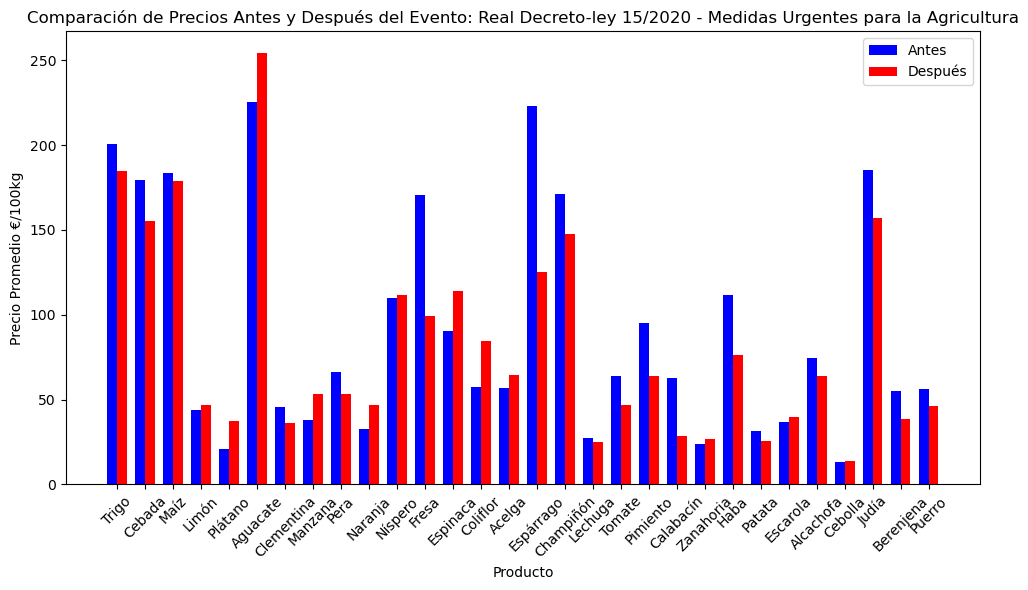

Cambio promedio de precios después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura': -10.18 €/100kg


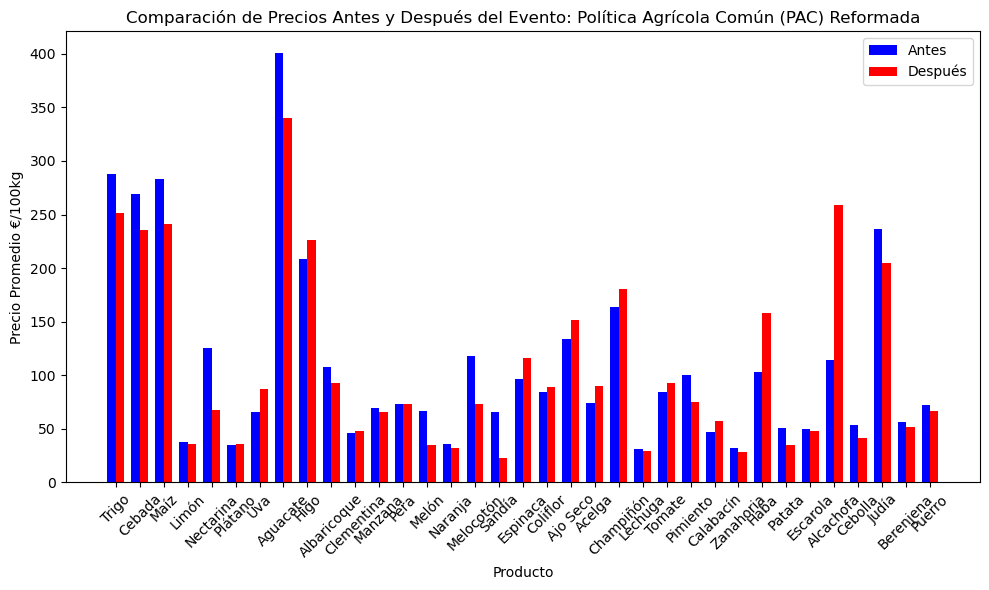

Cambio promedio de precios después del evento 'Política Agrícola Común (PAC) Reformada': -4.02 €/100kg


In [197]:

# Merge resultados_df con el dataframe de productos para obtener los nombres de los productos
merged_resultados_df = resultados_df.merge(producte[['idProducte', 'nom']], on='idProducte', how='left')

# Graficar resultados
eventos_unicos = resultados_df['Evento'].unique()

for evento in eventos_unicos:
    datos_evento = merged_resultados_df[merged_resultados_df['Evento'] == evento]
    nombres_productos = datos_evento['nom']
    promedios_antes = datos_evento['PromedioAntes']
    promedios_despues = datos_evento['PromedioDespues']
    cambio_promedio = datos_evento['Cambio'].mean()
    
    # Crear gráfico de barras
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    index = range(len(nombres_productos))
    
    plt.bar(index, promedios_antes, bar_width, label='Antes', color='blue')
    plt.bar([i + bar_width for i in index], promedios_despues, bar_width, label='Después', color='red')
    plt.xlabel('Producto')
    plt.ylabel('Precio Promedio €/100kg')
    plt.title(f'Comparación de Precios Antes y Después del Evento: {evento}')
    plt.xticks([i + bar_width / 2 for i in index], nombres_productos, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Cambio promedio de precios después del evento '{evento}': {cambio_promedio:.2f} €/100kg")

### 2.3 Comparaciones de Productos:

¿Qué productos son los más sensibles a los cambios en eventos políticos?

¿Hay productos cuyo precio se mantiene relativamente estable independientemente de los eventos externos?

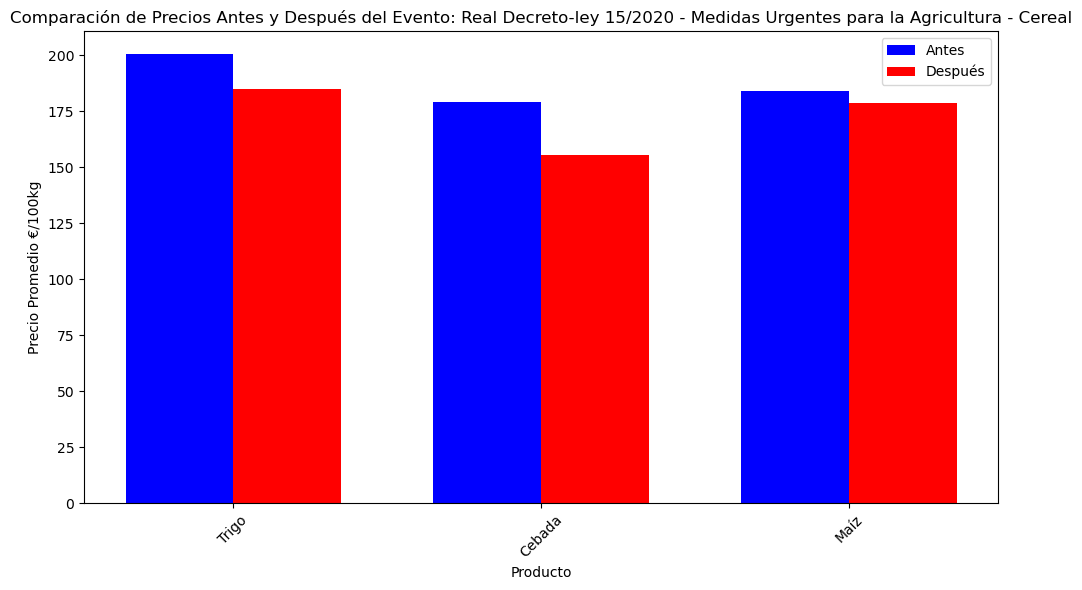

Cambio promedio de precios después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura' - Cereal: -14.78 €/100kg


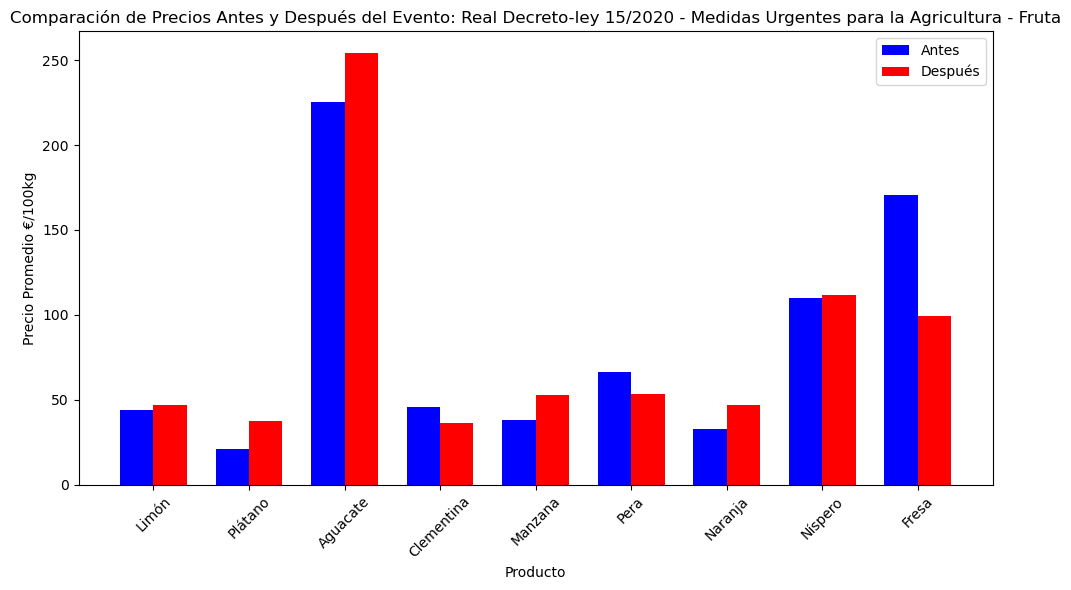

Cambio promedio de precios después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura' - Fruta: -1.41 €/100kg


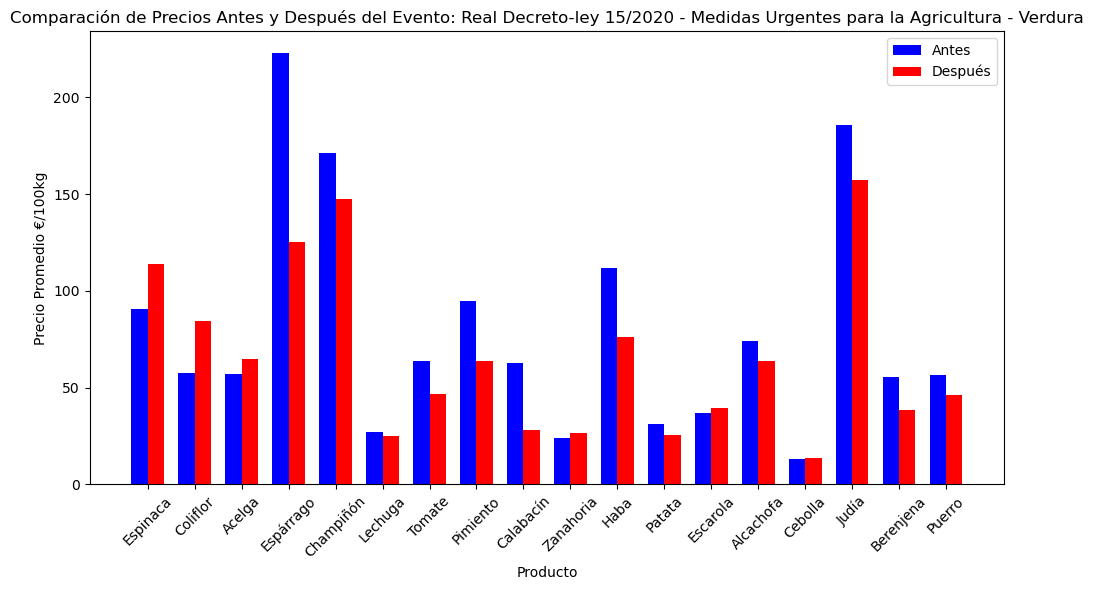

Cambio promedio de precios después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura' - Verdura: -13.80 €/100kg


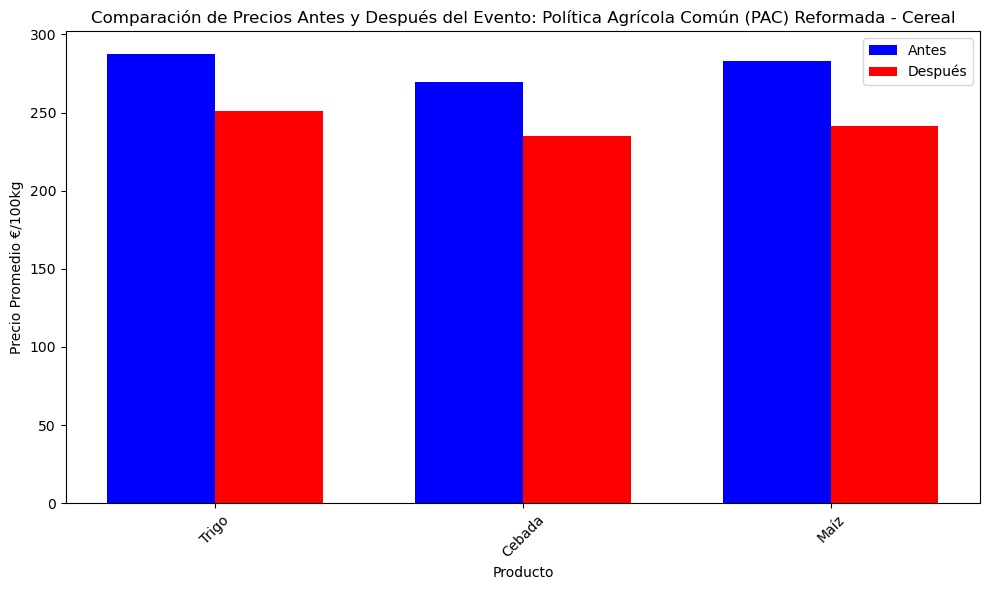

Cambio promedio de precios después del evento 'Política Agrícola Común (PAC) Reformada' - Cereal: -37.38 €/100kg


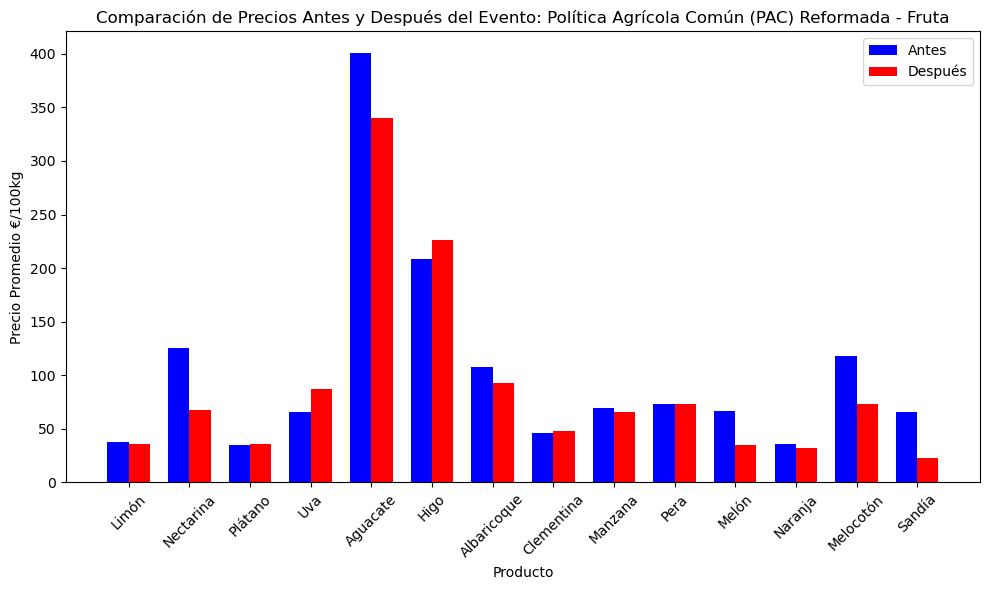

Cambio promedio de precios después del evento 'Política Agrícola Común (PAC) Reformada' - Fruta: -15.70 €/100kg


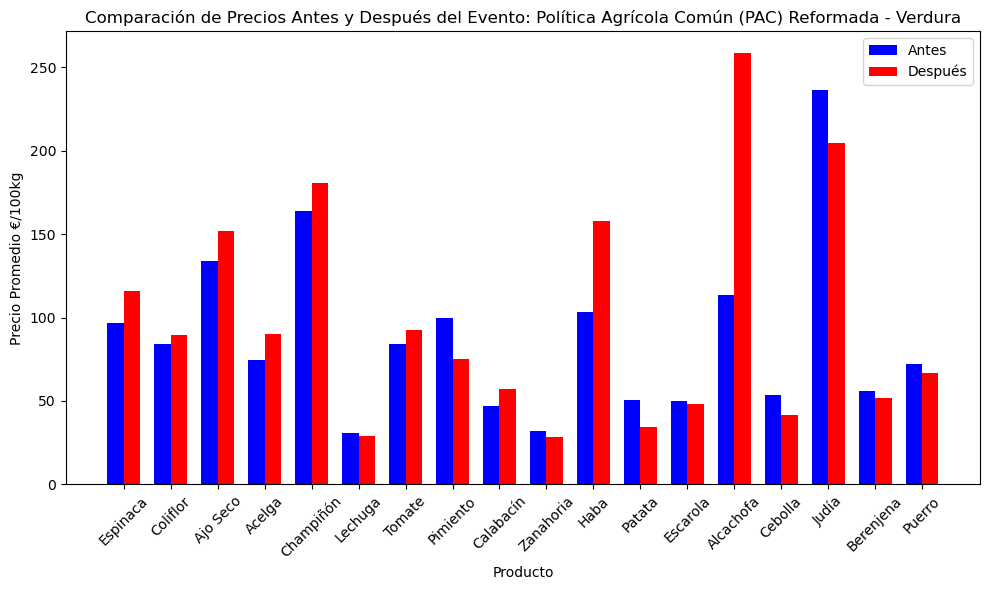

Cambio promedio de precios después del evento 'Política Agrícola Común (PAC) Reformada' - Verdura: 10.62 €/100kg


In [198]:
for evento in eventos_unicos:
    for tipo_producto in producte['tipus'].unique():
        datos_evento = merged_resultados_df[(merged_resultados_df['Evento'] == evento) & (merged_resultados_df['TipoProducto'] == tipo_producto)]
        nombres_productos = datos_evento['nom']
        promedios_antes = datos_evento['PromedioAntes']
        promedios_despues = datos_evento['PromedioDespues']
        cambio_promedio = datos_evento['Cambio'].mean()
        
        # Crear gráfico de barras
        plt.figure(figsize=(10, 6))
        bar_width = 0.35
        index = range(len(nombres_productos))
        
        plt.bar(index, promedios_antes, bar_width, label='Antes', color='blue')
        plt.bar([i + bar_width for i in index], promedios_despues, bar_width, label='Después', color='red')
        plt.xlabel('Producto')
        plt.ylabel('Precio Promedio €/100kg')
        plt.title(f'Comparación de Precios Antes y Después del Evento: {evento} - {tipo_producto}')
        plt.xticks([i + bar_width / 2 for i in index], nombres_productos, rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

        print(f"Cambio promedio de precios después del evento '{evento}' - {tipo_producto}: {cambio_promedio:.2f} €/100kg")




1. **Cambio promedio de precios después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura'**:
   - Para el cereal y las verduras, se observa una disminución en los precios después de la implementación del Real Decreto-ley 15/2020. Esta disminución podría ser contraintuitiva ya que estas medidas están destinadas a apoyar el sector agrícola y, teóricamente, podrían esperarse aumentos de precios.
   - Para la fruta, la disminución es menos pronunciada, lo que podría estar relacionado con una menor sensibilidad de la demanda de frutas frescas a las fluctuaciones económicas, especialmente durante la pandemia.

2. **Cambio promedio de precios después del evento 'Política Agrícola Común (PAC) Reformada'**:
   - Los cambios en los precios después de la reforma de la Política Agrícola Común (PAC) muestran una disminución más significativa en el precio del cereal y la fruta en comparación con el Real Decreto-ley 15/2020. Esto podría sugerir que la reforma de la PAC tuvo un impacto más marcado en estos sectores.
   - Sin embargo, la subida en el precio de las verduras después de la reforma de la PAC es notable y parece contradictoria. Esto podría indicar que la reforma tuvo efectos diferentes según el tipo de producto agrícola.

3. **Consideraciones sobre la falta de datos y eventos concurrentes**:
   Aunque los resultados del análisis nos dan cierta información sobre los cambios en los precios de los productos agrícolas después de eventos específicos, debemos interpretar estos resultados con cautela debido a las limitaciones de los datos y la posibilidad de eventos concurrentes que puedan afectar los resultados, esto concretamente ya que no hemos podido conseguir muchos datos y hemos tenido que poner márgenes de tiempos muy grandes (100 dias antes y 100 después).

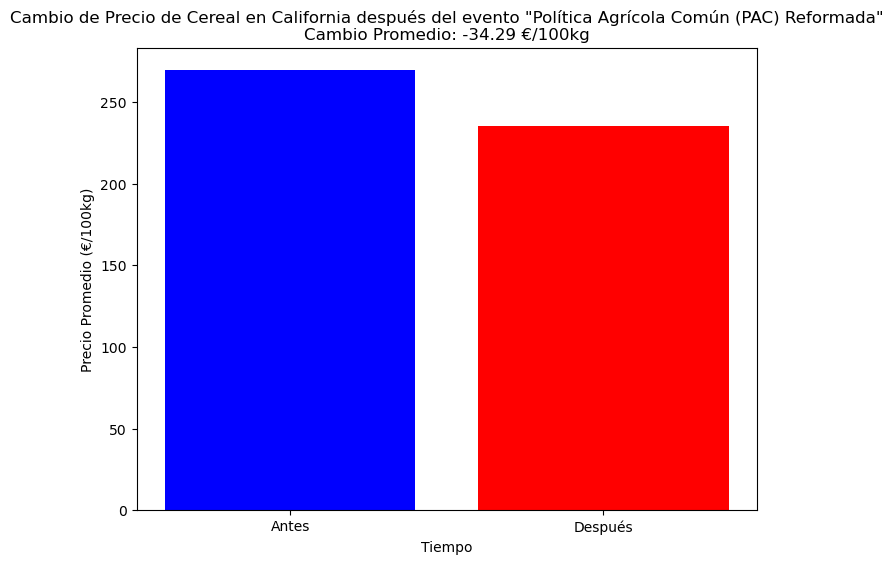

Cambio promedio de precio después del evento 'Política Agrícola Común (PAC) Reformada' - Cereal - California: -34.29 €/100kg


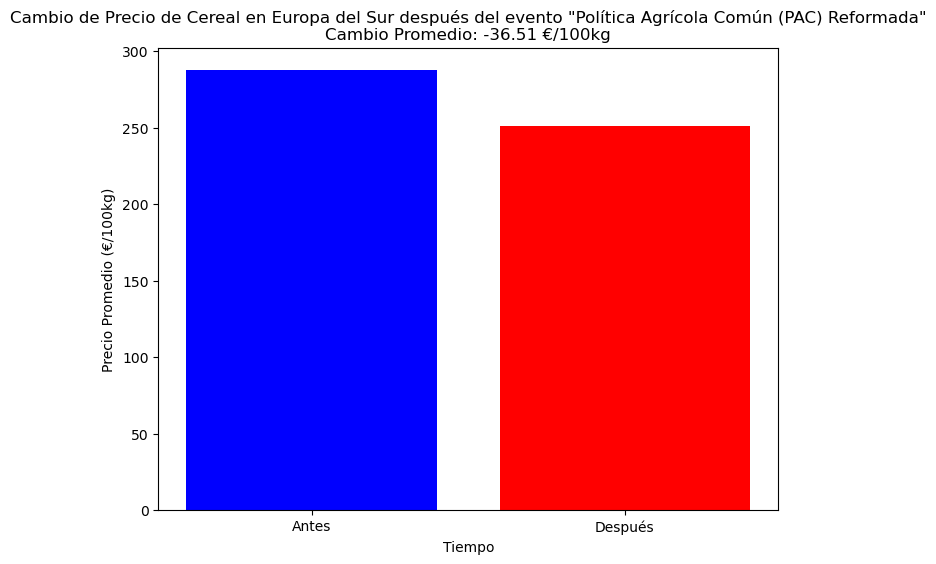

Cambio promedio de precio después del evento 'Política Agrícola Común (PAC) Reformada' - Cereal - Europa del Sur: -36.51 €/100kg


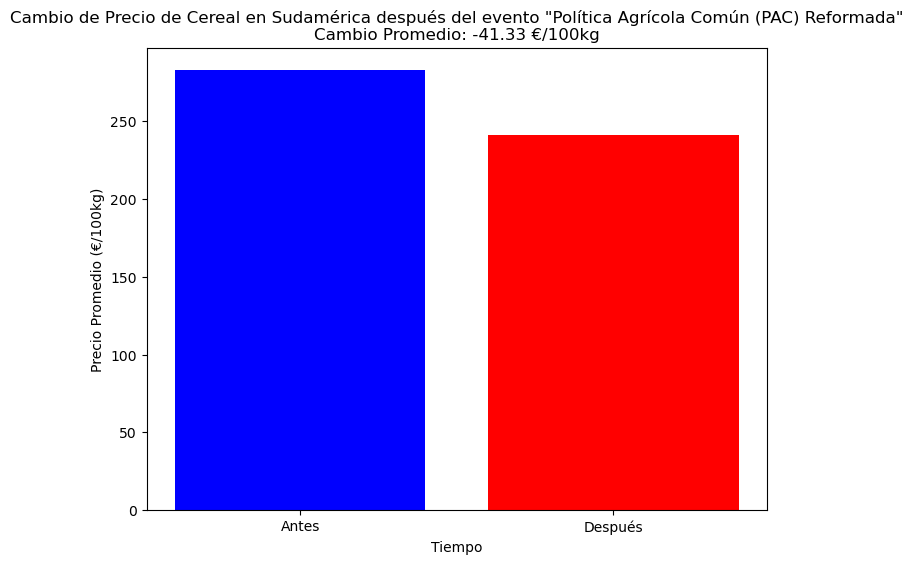

Cambio promedio de precio después del evento 'Política Agrícola Común (PAC) Reformada' - Cereal - Sudamérica: -41.33 €/100kg


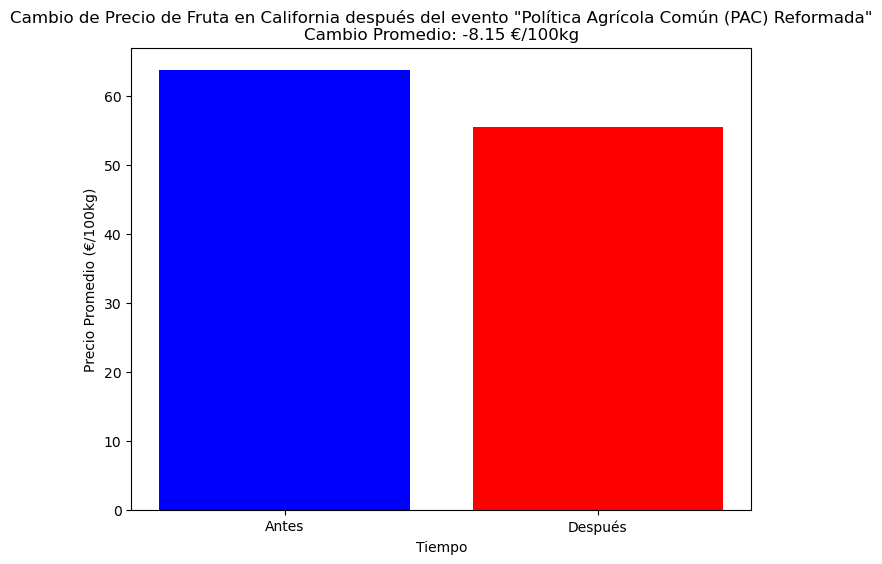

Cambio promedio de precio después del evento 'Política Agrícola Común (PAC) Reformada' - Fruta - California: -8.15 €/100kg


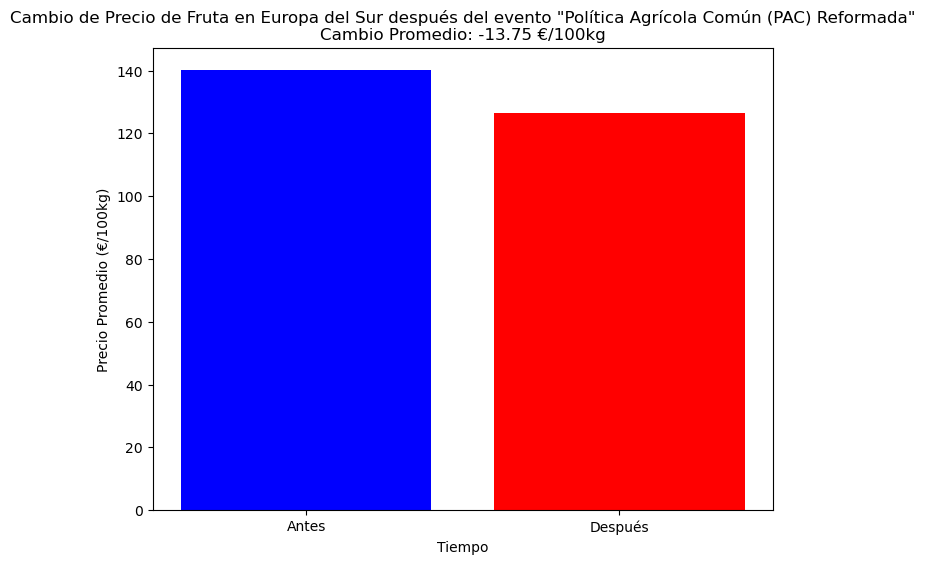

Cambio promedio de precio después del evento 'Política Agrícola Común (PAC) Reformada' - Fruta - Europa del Sur: -13.75 €/100kg


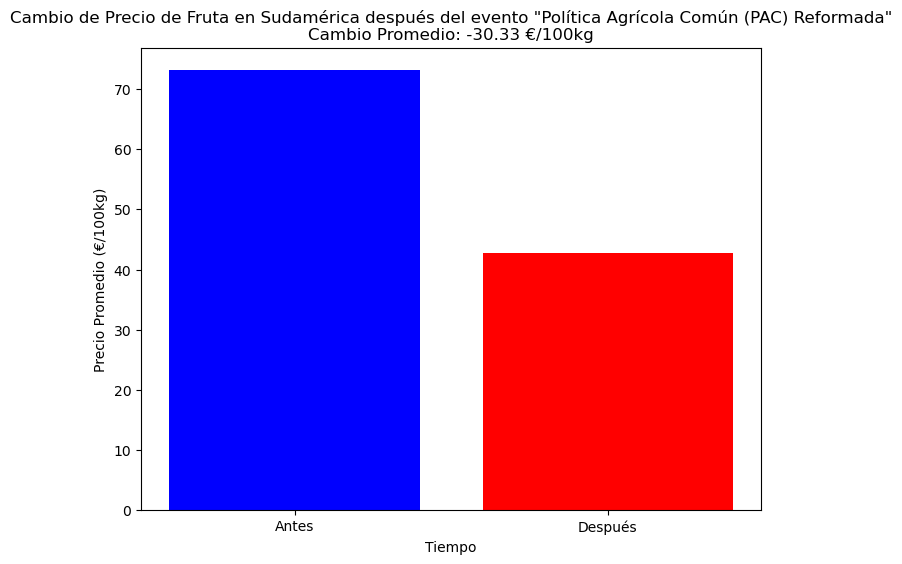

Cambio promedio de precio después del evento 'Política Agrícola Común (PAC) Reformada' - Fruta - Sudamérica: -30.33 €/100kg


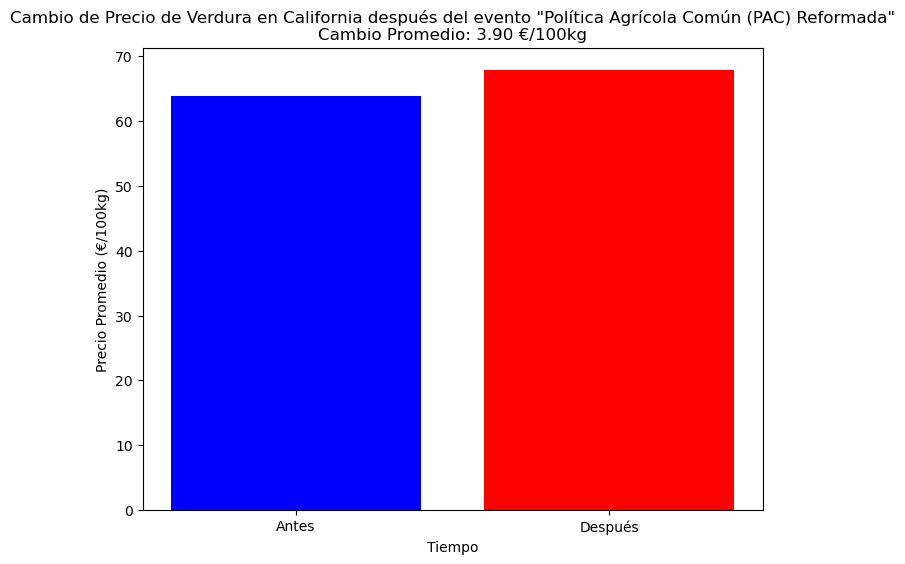

Cambio promedio de precio después del evento 'Política Agrícola Común (PAC) Reformada' - Verdura - California: 3.90 €/100kg


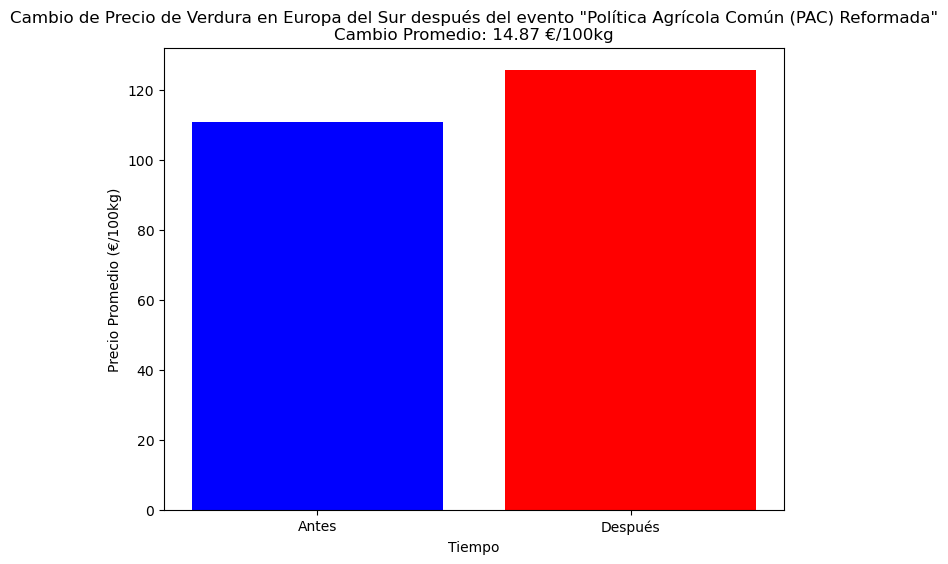

Cambio promedio de precio después del evento 'Política Agrícola Común (PAC) Reformada' - Verdura - Europa del Sur: 14.87 €/100kg


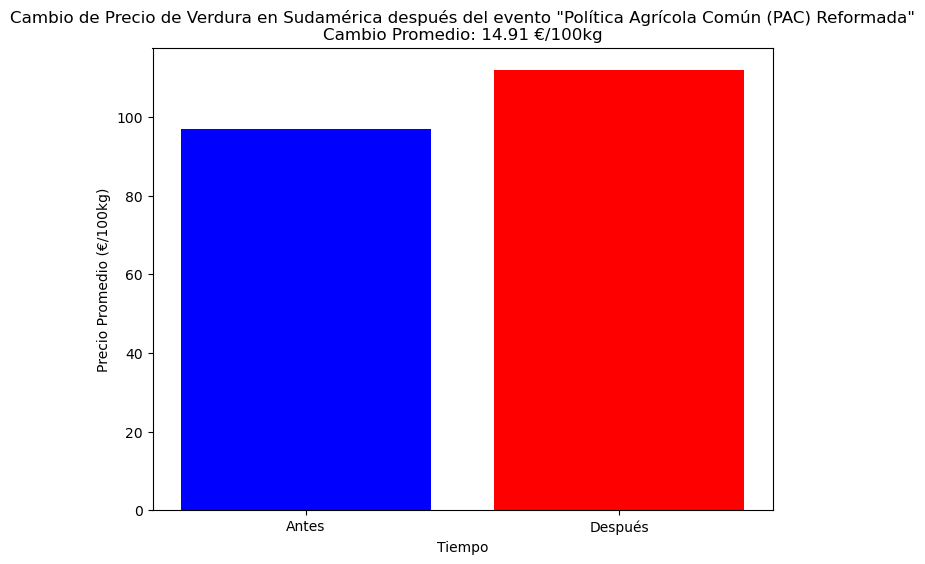

Cambio promedio de precio después del evento 'Política Agrícola Común (PAC) Reformada' - Verdura - Sudamérica: 14.91 €/100kg


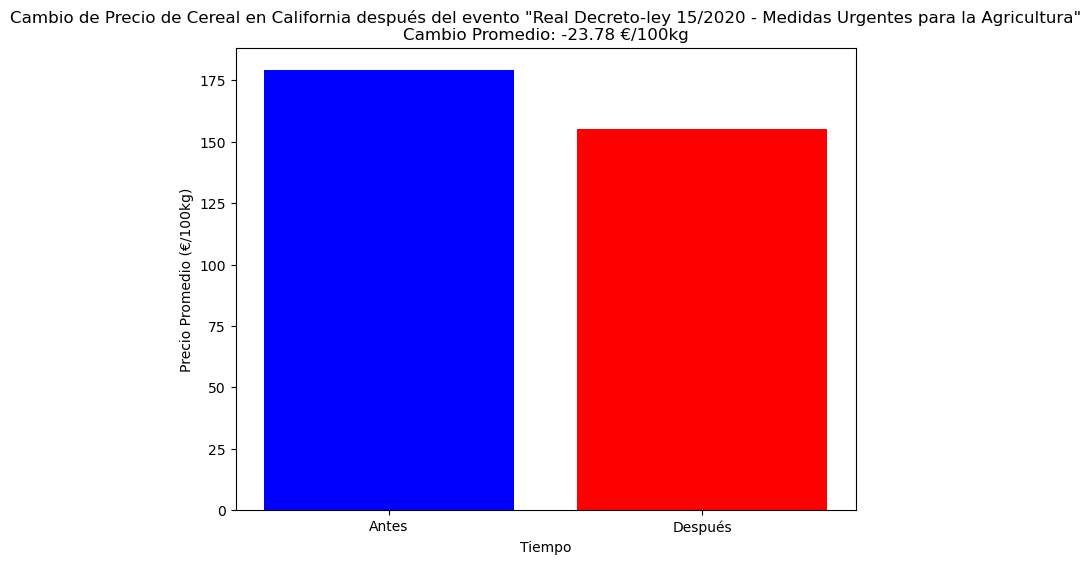

Cambio promedio de precio después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura' - Cereal - California: -23.78 €/100kg


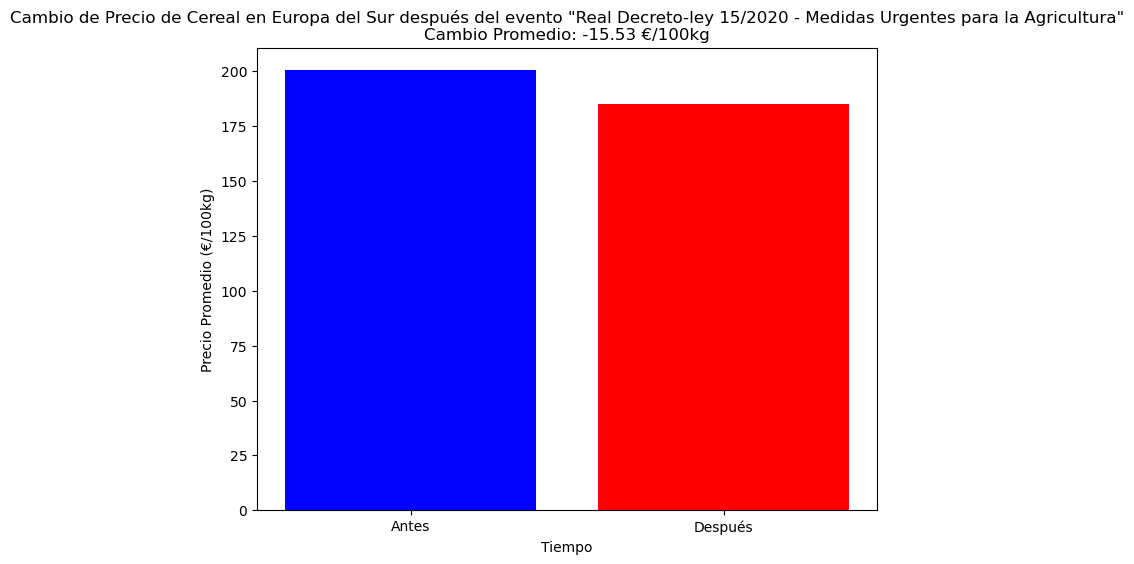

Cambio promedio de precio después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura' - Cereal - Europa del Sur: -15.53 €/100kg


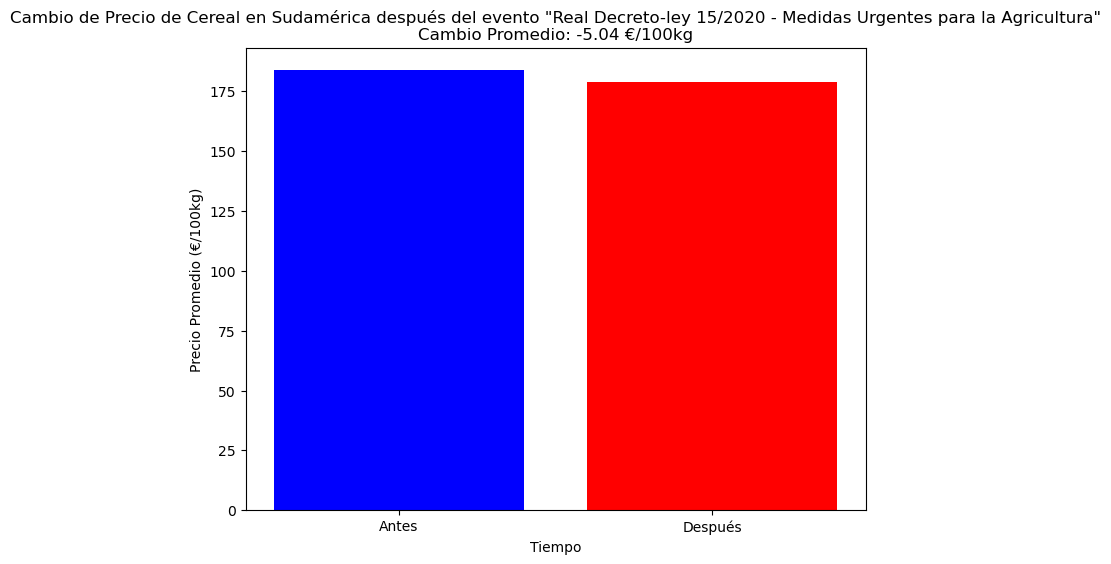

Cambio promedio de precio después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura' - Cereal - Sudamérica: -5.04 €/100kg


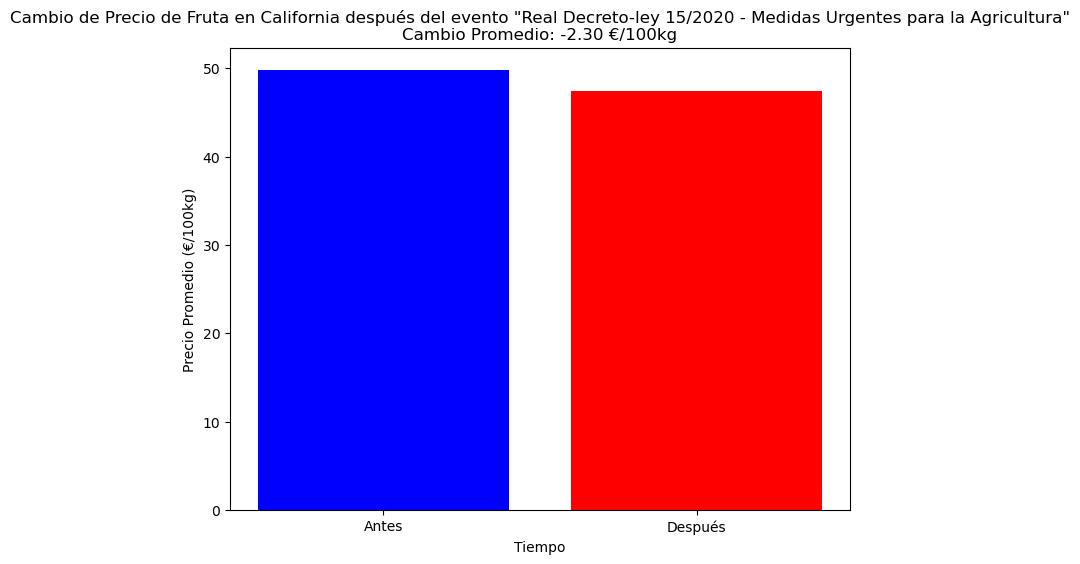

Cambio promedio de precio después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura' - Fruta - California: -2.30 €/100kg


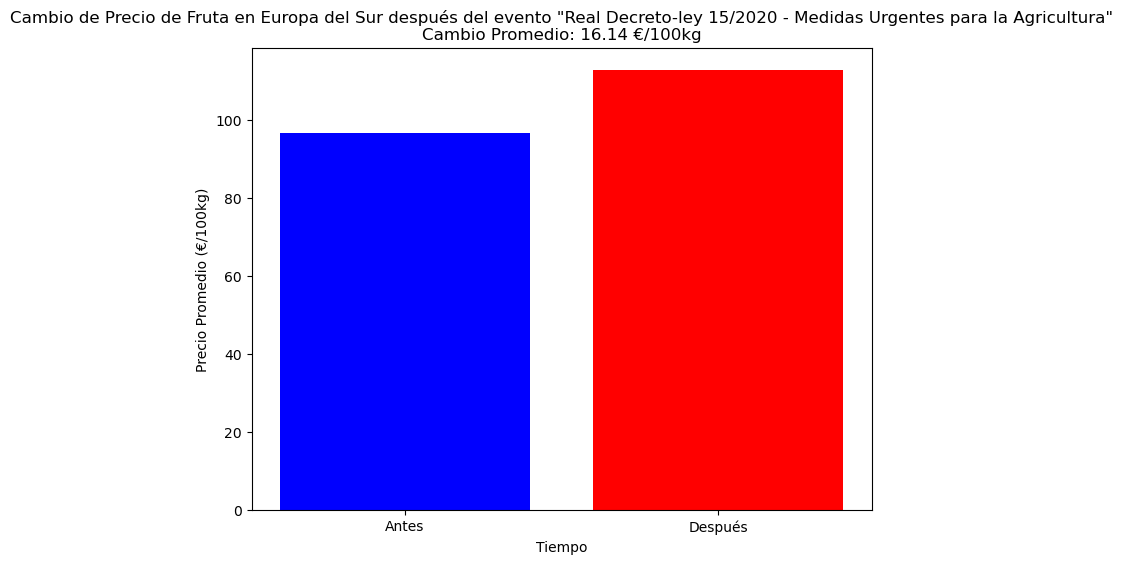

Cambio promedio de precio después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura' - Fruta - Europa del Sur: 16.14 €/100kg


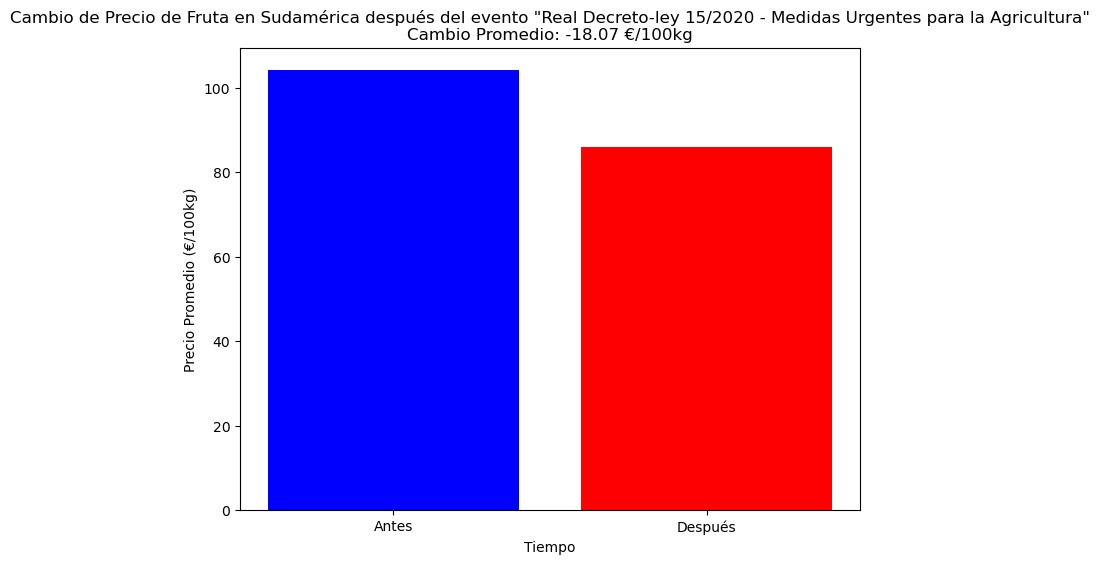

Cambio promedio de precio después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura' - Fruta - Sudamérica: -18.07 €/100kg


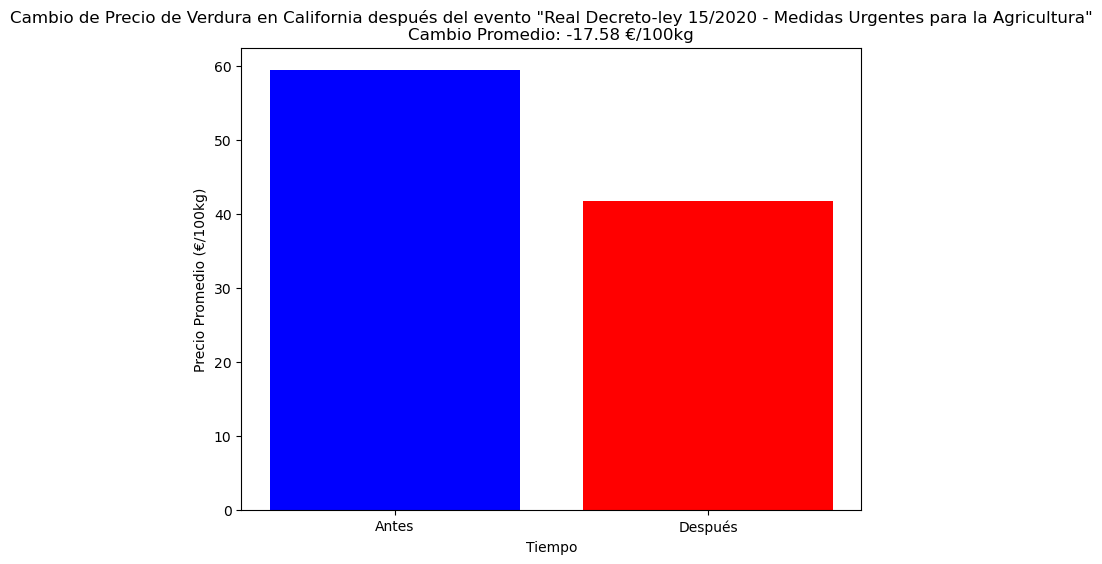

Cambio promedio de precio después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura' - Verdura - California: -17.58 €/100kg


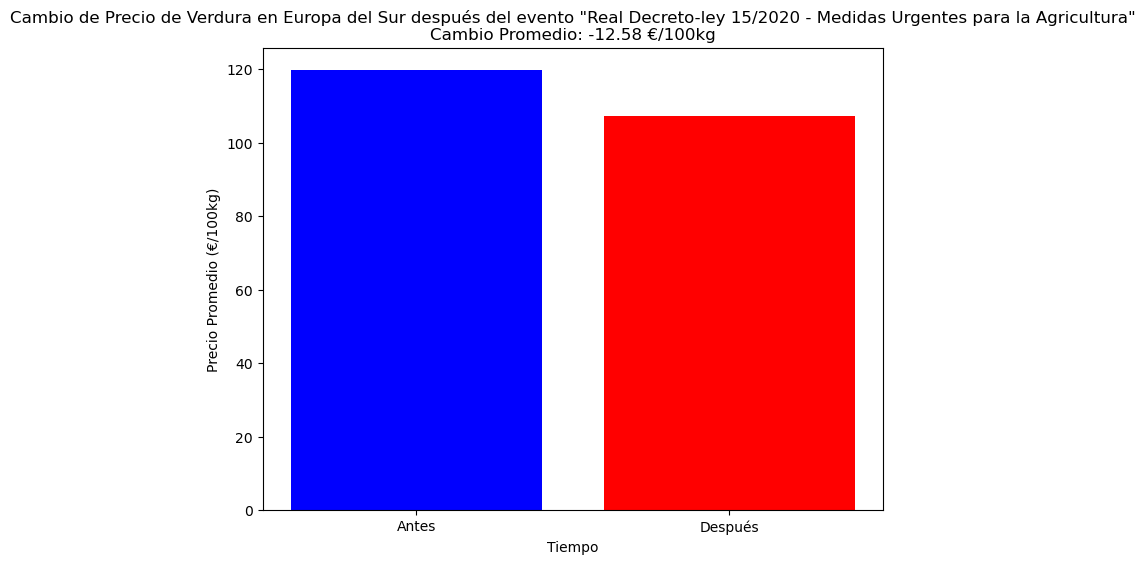

Cambio promedio de precio después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura' - Verdura - Europa del Sur: -12.58 €/100kg


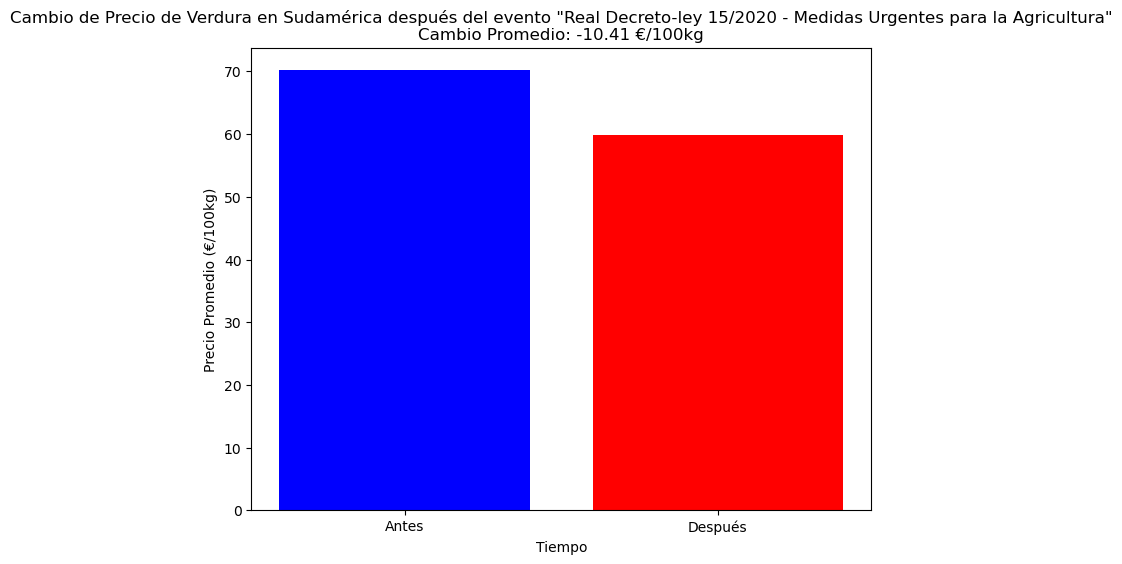

Cambio promedio de precio después del evento 'Real Decreto-ley 15/2020 - Medidas Urgentes para la Agricultura' - Verdura - Sudamérica: -10.41 €/100kg


In [201]:
import matplotlib.pyplot as plt

# Agrupar por evento, tipo de producto y región
grouped_data = resultados_df.groupby(['Evento', 'TipoProducto', 'Region'])

# Graficar cambio de precio antes vs después para cada grupo
for group, data in grouped_data:
    evento, tipo_producto, region = group
    
    cambio_promedio = data['Cambio'].mean()
    
    # Crear gráfico de barras
    plt.figure(figsize=(8, 6))
    plt.bar(['Antes', 'Después'], [data['PromedioAntes'].mean(), data['PromedioDespues'].mean()], color=['blue', 'red'])
    plt.xlabel('Tiempo')
    plt.ylabel('Precio Promedio (€/100kg)')
    plt.title(f'Cambio de Precio de {tipo_producto} en {region} después del evento "{evento}"\nCambio Promedio: {cambio_promedio:.2f} €/100kg')
    plt.show()
    
    # Imprimir cambio, región y tipo de producto
    print(f"Cambio promedio de precio después del evento '{evento}' - {tipo_producto} - {region}: {cambio_promedio:.2f} €/100kg")




1. **Cambio promedio de precio después de la reforma de la PAC**:
   - Cereal:
     - California: -34.29 €/100kg
     - Europa del Sur: -36.51 €/100kg
     - Sudamérica: -41.33 €/100kg
   - Fruta:
     - California: -8.15 €/100kg
     - Europa del Sur: -13.75 €/100kg
     - Sudamérica: -30.33 €/100kg
   - Verdura:
     - California: 3.90 €/100kg
     - Europa del Sur: 14.87 €/100kg
     - Sudamérica: 14.91 €/100kg

2. **Cambio promedio de precio después del Real Decreto-ley 15/2020**:
   - Cereal:
     - California: -23.78 €/100kg
     - Europa del Sur: -15.53 €/100kg
     - Sudamérica: -5.04 €/100kg
   - Fruta:
     - California: -2.30 €/100kg
     - Europa del Sur: 16.14 €/100kg
     - Sudamérica: -18.07 €/100kg
   - Verdura:
     - California: -17.58 €/100kg
     - Europa del Sur: -12.58 €/100kg
     - Sudamérica: -10.41 €/100kg

3. **Comparación entre la reforma de la PAC y el Real Decreto-ley 15/2020**:
   - En general, los cambios promedio de precios después de la reforma de la PAC muestran disminuciones más pronunciadas en los precios de los cereales y las frutas en comparación con el Real Decreto-ley 15/2020.
   - Sin embargo, la reforma de la PAC parece haber tenido un efecto diferente en los precios de las verduras, con aumentos en los precios en todas las regiones analizadas, mientras que el Real Decreto-ley 15/2020 mostró principalmente disminuciones en los precios de las verduras.
   - Los cambios en los precios de los cereales fueron más pronunciados en Sudamérica después de la reforma de la PAC, mientras que las disminuciones en los precios de las frutas fueron más significativas en Europa del Sur después del mismo evento.
   - En cuanto al Real Decreto-ley 15/2020, las disminuciones en los precios de los cereales fueron más notables en California, mientras que las disminuciones en los precios de las frutas fueron más pronunciadas en Sudamérica.


### 2.4 Análisis Regional:

¿Existen diferencias en la variabilidad de precios entre diferentes países o regiones?

¿Qué regiones experimentan la mayor volatilidad de precios y por qué?

In [187]:
# Convertir la columna 'data' a datetime
valor_mercat['data'] = pd.to_datetime(valor_mercat['data'])

# Merge para obtener información de la región
merged_df = valor_mercat.merge(producte, on='idProducte', how='left').merge(regio_geografica[['idRegio', 'nom']], on='idRegio', how='left')

# Calcular la desviación estándar de los precios para cada región
std_dev_by_region = merged_df.groupby('idRegio')['preu'].std()

# Merge para obtener el nombre de la región
std_dev_by_region_with_names = std_dev_by_region.reset_index().merge(regio_geografica[['idRegio', 'nom']], on='idRegio', how='left')

# Ordenar por la desviación estándar
std_dev_by_region_with_names = std_dev_by_region_with_names.sort_values(by='preu', ascending=False)

# Imprimir variabilidad de precios por región con nombres
print("Variabilidad de precios por región:")
std_dev_by_region_with_names


Variabilidad de precios por región:


,idRegio,preu,nom
0,1,93.383333,Europa del Sur
2,3,83.742479,Sudamérica
1,2,59.537641,California


In [190]:
# Convertir la columna 'data' a datetime
valor_mercat['data'] = pd.to_datetime(valor_mercat['data'])

# Merge para obtener información de la región
merged_df = valor_mercat.merge(producte, on='idProducte', how='left').merge(regio_geografica[['idRegio', 'nom']], on='idRegio', how='left')

# Calcular la desviación estándar de los precios para cada región
std_dev_by_region = merged_df.groupby(['idRegio', 'tipus'])['preu'].std()

# Merge para obtener el nombre de la región
std_dev_by_region_with_names = std_dev_by_region.reset_index().merge(regio_geografica[['idRegio', 'nom']], on='idRegio', how='left')

# Ordenar por la desviación estándar
std_dev_by_region_with_names = std_dev_by_region_with_names.sort_values(by='preu', ascending=False)

# Imprimir variabilidad de precios por región con nombres
frutas_std = std_dev_by_region_with_names[std_dev_by_region_with_names['tipus'] == 'Fruta']
verduras_std = std_dev_by_region_with_names[std_dev_by_region_with_names['tipus'] == 'Verdura']
cereales_std = std_dev_by_region_with_names[std_dev_by_region_with_names['tipus'] == 'Cereal']




In [191]:
print("Variabilidad de precios de frutas por región:")
frutas_std

Variabilidad de precios de frutas por región:


,idRegio,tipus,preu,nom
1,1,Fruta,105.976157,Europa del Sur
7,3,Fruta,77.731526,Sudamérica
4,2,Fruta,22.355679,California


In [192]:
print("Variabilidad de precios de verduras por región:")
verduras_std

Variabilidad de precios de verduras por región:


,idRegio,tipus,preu,nom
2,1,Verdura,66.894696,Europa del Sur
8,3,Verdura,66.099438,Sudamérica
5,2,Verdura,34.401173,California


In [193]:
print("Variabilidad de precios de cereales por región:")
cereales_std

Variabilidad de precios de cereales por región:


,idRegio,tipus,preu,nom
6,3,Cereal,65.051503,Sudamérica
3,2,Cereal,63.454853,California
0,1,Cereal,62.317615,Europa del Sur



1. **Variabilidad de precios de frutas por región**:

   - **Europa del Sur**: La media de los precios de las frutas en Europa del Sur es de aproximadamente 105.98 €/kg, lo que indica precios relativamente altos en esta región. Esto sugiere una posible preferencia por frutas de alta calidad o una oferta limitada que influye en los precios.
   
   - **Sudamérica**: Los precios promedio de las frutas en Sudamérica son de alrededor de 77.73 €/kg. Esto sugiere una diferencia considerable en los precios de las frutas en comparación con Europa del Sur, lo que podría atribuirse a diferencias en la producción, demanda y distribución.
   
   - **California**: Los precios promedio de las frutas en California son mucho más bajos, alrededor de 22.36 €/kg. Esto puede indicar una oferta abundante o una competencia más intensa en el mercado de frutas en esta región.

2. **Variabilidad de precios de verduras por región**:

   - **Europa del Sur**: La media de los precios de las verduras en Europa del Sur es de aproximadamente 66.89 €/kg. Esto sugiere precios relativamente altos en comparación con las otras regiones, lo que podría ser atribuible a factores como la demanda del consumidor, la calidad y la disponibilidad estacional.
   
   - **Sudamérica**: Los precios promedio de las verduras en Sudamérica son cercanos, alrededor de 66.10 €/kg. Esto sugiere una estabilidad en los precios de las verduras en esta región en comparación con Europa del Sur y California.
   
   - **California**: Los precios promedio de las verduras en California son los más bajos, alrededor de 34.40 €/kg. Esto podría deberse a una mayor disponibilidad de productos agrícolas en esta región, así como a prácticas agrícolas y costos de producción diferentes.

3. **Variabilidad de precios de cereales por región**:

   - **Sudamérica**: Los precios promedio de los cereales en Sudamérica son de alrededor de 65.05 €/kg. Esto podría indicar una variabilidad considerable en los precios de los cereales en esta región, posiblemente debido a factores como la variabilidad climática y la oferta y demanda fluctuante.
   
   - **California**: Los precios promedio de los cereales en California son de aproximadamente 63.45 €/kg, lo que sugiere una estabilidad relativa en comparación con Sudamérica.
   
   - **Europa del Sur**: Los precios promedio de los cereales en Europa del Sur son de alrededor de 62.32 €/kg, lo que indica precios relativamente estables en esta región en comparación con Sudamérica.

Estos análisis sugieren que hay diferencias significativas en los precios de frutas, verduras y cereales entre las tres regiones, lo que puede estar influenciado por una variedad de factores, incluyendo la oferta y demanda, la calidad del producto y los costos de producción.